<a href="https://colab.research.google.com/github/meiqingli/PAD-6716/blob/main/PAD_6716_Python_Geospatial_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Mount Google Drive
Mount to Google Drive and set working directory so that you have access to the files saved under this account.

In [1]:
import os

if os.path.exists('/content/'):
    from google.colab import drive
    import os
    drive.mount('/content/drive')
    os.chdir('/content/drive/MyDrive/Colab Notebooks')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Introduction to GeoPandas

In this lesson, we'll learn about a package that is core to using geospatial data in Python: GeoPandas. We'll explore the structure of geospatial data (which, turns out, is not too different from DataFrames!), including geometries, shapefiles, and how to save your hard work.

## What is GeoPandas?
`GeoPandas` is a relatively new package that makes it easier to work with geospatial data in Python. In the last few years it has grown more powerful and stable, allow Python to practioners to more easily and flexibly work with geospatial data in Python, which had been difficult in the past.

If you work with raster data, check out the `rasterio` package. We will not have time to cover it in this class in the interest of time.

### Import Libraries

Let's start by importing the libraries that we will use. If you haven't already, you can install `GeoPandas` within this notebook:

In [2]:
# Install GeoPandas if you don't have it yet
%pip install geopandas

In [3]:
import pandas as pd
import geopandas as gpd

import matplotlib # Base python plotting library
import matplotlib.pyplot as plt # Submodule of matplotlib

# To display plots, maps, charts etc in the notebook
%matplotlib inline

### Read in Shapefiles

Let's try is out with the US county boundary files, and use `GeoPandas` for the first time. We can use a flexible function called `gpd.read_file` to read in many different types of geospatial data. When using it, we will specify the `shp` file.

In [4]:
# Read in the counties shapefile
counties = gpd.read_file('PAD_6716 Python Data/tl_2024_us_county/tl_2024_us_county.shp')

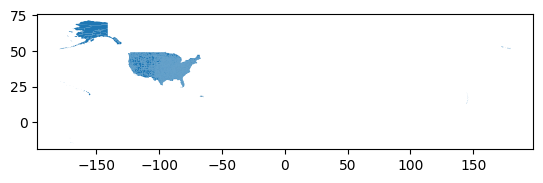

In [5]:
# Plot out US counties
counties.plot();

## Exloring the GeoPandas GeoDataFrame

Before we get in too deep, let's discuss what a GeoDataFrame is and how it's different from a pandas DataFrame.

A [GeoPandas GeoDataFrame](https://geopandas.org/en/stable/docs/user_guide/data_structures.html), or `gdf` for short, is just like a pandas DataFrame (`df`) but with an extra geometry column as well as accompanying methods and attributes that work on that column. This means all the methods and attributes of a pandas DataFrame also work on a GeoPandas GeoDataFrame.

With that in mind, let's start exploring our dataframe just like we would do in pandas.

In [6]:
# Find the number of rows and columns in countries
counties.shape

(3235, 19)

In [7]:
# Look at the first couple of rows in our geodataframe
counties.head()

STATEFP COUNTYFP  COUNTYNS  GEOID         GEOIDFQ       NAME  \
0      31      039  00835841  31039  0500000US31039     Cuming   
1      53      069  01513275  53069  0500000US53069  Wahkiakum   
2      35      011  00933054  35011  0500000US35011    De Baca   
3      31      109  00835876  31109  0500000US31109  Lancaster   
4      31      129  00835886  31129  0500000US31129   Nuckolls   

           NAMELSAD LSAD CLASSFP  MTFCC CSAFP CBSAFP METDIVFP FUNCSTAT  \
0     Cuming County   06      H1  G4020  None   None     None        A   
1  Wahkiakum County   06      H1  G4020  None   None     None        A   
2    De Baca County   06      H1  G4020  None   None     None        A   
3  Lancaster County   06      H1  G4020   339  30700     None        A   
4   Nuckolls County   06      H1  G4020  None   None     None        A   

        ALAND    AWATER     INTPTLAT      INTPTLON  \
0  1477563042  10772508  +41.9158651  -096.7885168   
1   680980773  61564428  +46.2946377  -123.4244583   
2  6016818941  29090018  +34.3592729  -104.3686961   
3  2169269508  22850511  +40.7835474  -096.6886584   
4  1489645201   1718484  +40.1764918  -098.0468422   

                                            geometry  
0  POLYGON ((-96.55525 41.82892, -96.55524 41.827...  
1  POLYGON ((-123.72755 46.26449, -123.72755 46.2...  
2  POLYGON ((-104.89337 34.08894, -104.89337 34.0...  
3  POLYGON ((-96.68493 40.52330, -96.69219 40.523...  
4  POLYGON ((-98.27370 40.11840, -98.27374 40.122...

In [8]:
# We may check all variables included in our data
counties.columns

Index(['STATEFP', 'COUNTYFP', 'COUNTYNS', 'GEOID', 'GEOIDFQ', 'NAME',
       'NAMELSAD', 'LSAD', 'CLASSFP', 'MTFCC', 'CSAFP', 'CBSAFP', 'METDIVFP',
       'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON', 'geometry'],
      dtype='object')

In [9]:
counties['STATEFP'].unique()

array(['31', '53', '35', '72', '46', '48', '06', '21', '39', '01', '13',
       '55', '05', '41', '42', '28', '29', '08', '37', '49', '40', '51',
       '47', '56', '54', '22', '36', '26', '18', '25', '20', '16', '12',
       '02', '78', '32', '17', '50', '30', '34', '27', '38', '24', '19',
       '45', '23', '15', '33', '04', '10', '11', '66', '69', '60', '44',
       '09'], dtype=object)

In [10]:
counties.STATEFP.unique()

array(['31', '53', '35', '72', '46', '48', '06', '21', '39', '01', '13',
       '55', '05', '41', '42', '28', '29', '08', '37', '49', '40', '51',
       '47', '56', '54', '22', '36', '26', '18', '25', '20', '16', '12',
       '02', '78', '32', '17', '50', '30', '34', '27', '38', '24', '19',
       '45', '23', '15', '33', '04', '10', '11', '66', '69', '60', '44',
       '09'], dtype=object)

You may check the State FIPS codes [here](https://transition.fcc.gov/oet/info/maps/census/fips/fips.txt). The one for Florida is 12. We can make a selection of features in the same way with `pandas`. For example, we can select counties within Florida from the list of counties.

In [11]:
florida_counties = counties.loc[counties['STATEFP'] == '12'].copy().reset_index(drop=True)
florida_counties.head()

STATEFP COUNTYFP  COUNTYNS  GEOID         GEOIDFQ      NAME  \
0      12      053  00295751  12053  0500000US12053  Hernando   
1      12      129  00306912  12129  0500000US12129   Wakulla   
2      12      131  00295727  12131  0500000US12131    Walton   
3      12      127  00306921  12127  0500000US12127   Volusia   
4      12      051  00307626  12051  0500000US12051    Hendry   

          NAMELSAD LSAD CLASSFP  MTFCC CSAFP CBSAFP METDIVFP FUNCSTAT  \
0  Hernando County   06      H1  G4020  None  45300    45294        A   
1   Wakulla County   06      H1  G4020   533  45220     None        A   
2    Walton County   06      H1  G4020  None  18880     None        A   
3   Volusia County   06      H1  G4020   422  19660     None        A   
4    Hendry County   06      H1  G4020   163  17500     None        A   

        ALAND     AWATER     INTPTLAT      INTPTLON  \
0  1224979323  627916623  +28.5559951  -082.5259685   
1  1570615734  804111188  +30.0913354  -084.3591114   
2  2689194489  961260714  +30.5712465  -086.1627980   
3  2851878125  858117923  +29.0577690  -081.1617920   
4  2993896405   86578552  +26.5399670  -081.1521142   

                                            geometry  
0  POLYGON ((-82.25329 28.47849, -82.25329 28.478...  
1  POLYGON ((-84.16080 29.92127, -84.16104 29.915...  
2  POLYGON ((-86.39203 30.75066, -86.39185 30.753...  
3  POLYGON ((-80.89930 28.79097, -80.89956 28.790...  
4  POLYGON ((-81.56656 26.71338, -81.56653 26.713...

In [12]:
florida_counties.shape

(67, 19)

We can further filter only the Orange County using similar syntax.



In [13]:
orange_county = florida_counties.loc[florida_counties['NAME'] == 'Orange'].copy().reset_index(drop=True)
orange_county

STATEFP COUNTYFP  COUNTYNS  GEOID         GEOIDFQ    NAME       NAMELSAD  \
0      12      095  00295750  12095  0500000US12095  Orange  Orange County   

  LSAD CLASSFP  MTFCC CSAFP CBSAFP METDIVFP FUNCSTAT       ALAND     AWATER  \
0   06      H1  G4020   422  36740     None        A  2338842795  260043058   

      INTPTLAT      INTPTLON  \
0  +28.5143906  -081.3232839   

                                            geometry  
0  POLYGON ((-81.15781 28.61222, -81.14608 28.612...

## Save Your Data

Let's not forget to save our new geodataframe. This way we won't need to repeat the processing steps we did above.

We can save it as a shapefile.

In [14]:
florida_counties.to_file("PAD_6716 Python Data/florida_counties.shp")
orange_county.to_file("PAD_6716 Python Data/orange_county.shp")

Alternatively, we can save the file into [GeoJSON](https://geojson.org/) format.

In [15]:
florida_counties.to_file("PAD_6716 Python Data/florida_counties.json", driver='GeoJSON')

You can read these in, just as you would for a shapefile with `gpd.read_file`:

In [16]:
florida_counties_test2 = gpd.read_file("PAD_6716 Python Data/florida_counties.json")

## Plot the GeoDataFrame

We're able to plot our GeoDataFrame because of the extra `geometry` column. What exactly does this column provide?

### GeoPandas Geometries

There are three main types of geometries that can be associated with your GeoDataFrame: points, lines and polygons.

In the GeoDataFrame, these geometries are encoded in a format known as Well-Known Text (WKT) [link text](https://en.wikipedia.org/wiki/Well-known_text_representation_of_geometry). Consider the following examples:

*   POINT (30 10)
*   LINESTRING (30 10, 10 30, 40 40)
*   POLYGON ((30 10, 40 40, 20 40, 10 20, 30 10))

In each case, coordinates are separated by a spaces, and coordinate pairs are separated by commas.

Your geodataframe may also include the variants **multipoints, multilines, and multipolgyons** if the row-level feature of interest is comprised of multiple parts. For example, a GeoDataFrame of states, where one row represents one state, would have a POLYGON geometry for Utah but MULTIPOLYGON for Hawaii, which includes many islands.

Note that, it's OK to mix and match geometries of the same family, e.g., POLYGON and MULTIPOLYGON, in the same GeoDataFrame.

Let's plot the Orange County. We can specify the [color](https://matplotlib.org/stable/gallery/color/named_colors.html) of the shape.

There are also many other formats we could use for data output.

💡 Tip: If you're working with point data (i.e. a single latitude and longitude value per feature), then CSV might be a good option.

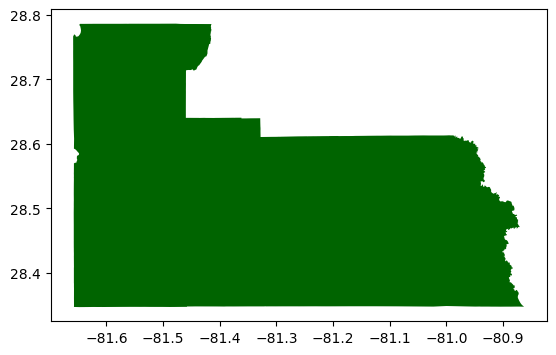

In [17]:
orange_county.plot(color='darkgreen');

# 2. CRS and Map Projections

## Working with CRSs in GeoPandas

### Identifying the CRS of a GeoDataFrame

GeoPandas GeoDataFrames have a `crs` attribute that returns the CRS of the data:

In [18]:
counties.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [19]:
print(counties.crs)

EPSG:4269


### Setting the CRS

You can also set the CRS of a GeoDataFrame using the `crs` attribute. You should set the CRS if is not defined or if you think it is incorrectly defined.

> In desktop GIS terminology, setting the CRS is called **defining the CRS**.

As an example, let's set the CRS of our data to `None`:

In [20]:
# First, set the CRS to None
counties.crs = None

In [21]:
# Check it again
print(counties.crs)

None


In [22]:
counties.crs

💡 Tip: if a variable has a null value (None), then displaying it without printing it won't display anything!

Now, we'll set it back to its correct CRS:

In [23]:
# Set it to 3857
counties.crs = "epsg:3857"
counties.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

💡 Tip: You can set the CRS to anything you like, but that doesn't make it correct! This is because setting the CRS does not change the coordinate data. It just tells the software how to interpret it.

### Transforming or Reprojecting the CRS

You can transform the CRS of a GeoDataFrame with the  to_crs   method.

> In desktop GIS terminology transforming the CRS is called projecting the data (or reprojecting the data).

When you do this, you should save the output to a new GeoDataFrame.

In [24]:
counties_utm10 = counties.to_crs("epsg:26910")


Now, take a look at the new CRS:

In [25]:
counties_utm10.crs

<Projected CRS: EPSG:26910>
Name: NAD83 / UTM zone 10N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: North America - between 126°W and 120°W - onshore and offshore. Canada - British Columbia; Northwest Territories; Yukon. United States (USA) - California; Oregon; Washington.
- bounds: (-126.0, 30.54, -119.99, 81.8)
Coordinate Operation:
- name: UTM zone 10N
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

 ### Combined Plots

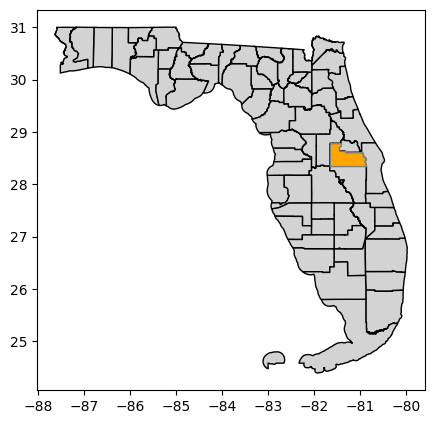

In [26]:
# Plot Orange County and Florida counties together!
fig, ax = plt.subplots(figsize=(5,5))
florida_counties.plot(color='lightgrey', edgecolor='black', ax=ax);
orange_county.plot(color='orange', edgecolor='gray', ax=ax);

# 3. Mapping

## More Data More Maps: Orlando Bike Facilities

Let's overlay more data on the Orange County base map.

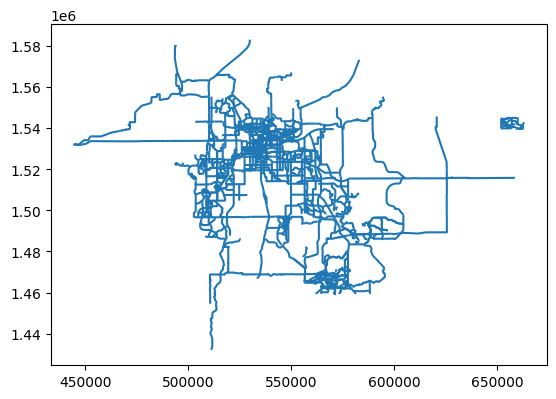

In [27]:
bike_facilities = gpd.read_file('PAD_6716 Python Data/OrlandoBikeFacilities/Orlando_Bike_Facilities.shp')
bike_facilities.plot();

In [28]:
bike_facilities.crs

<Projected CRS: PROJCS["NAD83 / Florida East (ftUS)",GEOGCS["NAD83 ...>
Name: NAD83 / Florida East (ftUS)
Axis Info [cartesian]:
- [east]: Easting (US survey foot)
- [north]: Northing (US survey foot)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

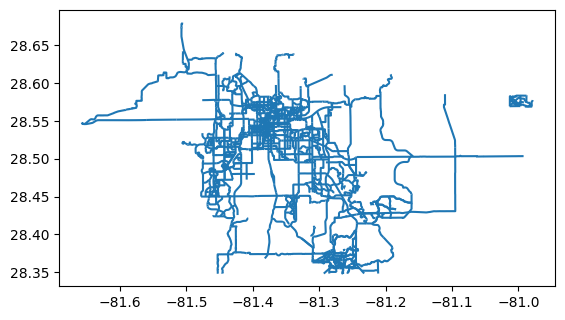

In [29]:
# clip bike data to Orange County
from shapely.geometry import box

bike_facilities_map = bike_facilities.to_crs("epsg:4269")
bike_facilities_orange = bike_facilities_map.clip(orange_county)

bike_facilities_orange.plot();

## More Data More Map: Orange County Schools

Let's map K-12 schools in Orange County.

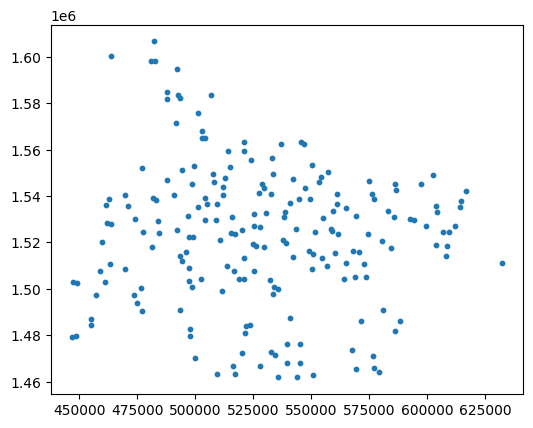

In [30]:
school_orange = gpd.read_file('PAD_6716 Python Data/K-12_School_Locations_2023-24/K-12_School_Locations_2023-24.shp')
school_orange.plot(markersize=10);

## Put Them All Together

Write code to overlay bike facilities and schools with Orange County Boundary.

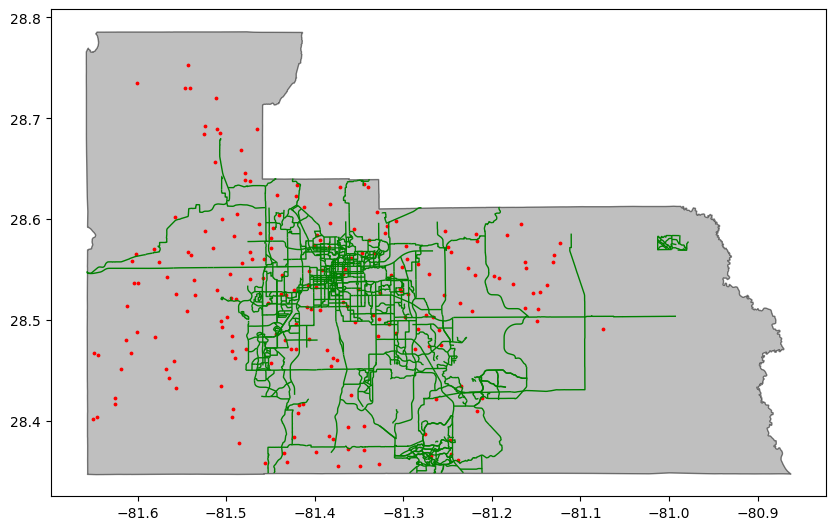

In [31]:
# project layers to the same projection
school_orange_map = school_orange.to_crs("epsg:4269")
bike_facilities_orange_map = bike_facilities_orange.to_crs("epsg:4269")
orange_county_map = orange_county.to_crs("epsg:4269")

fig, ax = plt.subplots(figsize=(10,10))
orange_county.plot(color='gray', edgecolor='black', alpha=0.5, ax=ax)
bike_facilities_orange.plot(color='green', linewidth=1, ax=ax)
school_orange_map.plot(color='red', markersize=3, ax=ax);

# 4. Spatial Analysis

## Spatial Join

A **spatial join**, is the process by which we can leverage the spatial relationships between distinct datasets to merge their information into a new, synthetic dataset. This operation can be thought as the spatial equivalent of an **attribute join**, in which multiple tabular datasets can be merged by aligning matching values in a common column that they both contain. If you've done data wrangling in Python with `pandas`, you've probably performed an attribute join at some point.


In [32]:
%pip install mapclassify

In [33]:
import mapclassify

## Spatial Join

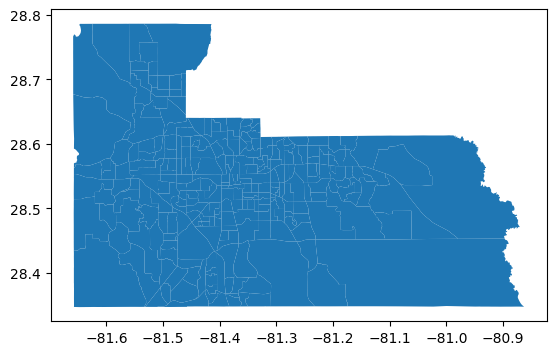

In [34]:
# import Orange County census tract
tract_orange = gpd.read_file('PAD_6716 Python Data/Orange County CensusTract/Orange County CensusTract.shp')
tract_orange.plot()
plt.show()

In [35]:
# convert crs to that of Orange schools
tract_orange = tract_orange.to_crs("epsg:4269")

💡 Tip: Alternatively, we can use the following code to convert crs without having to type out EPSG code.
> `orange_tract = orange_tract.to_crs(school_orange_map.crs)`

In [36]:
# check if the crs' are the same
tract_orange.crs == school_orange_map.crs

True

In [37]:
print(f'Orange school CRS: {school_orange_map.crs}')
print(f'Orange tract CRS: {tract_orange.crs}')

Orange school CRS: epsg:4269
Orange tract CRS: EPSG:4269


In [38]:
tract_orange.shape

(267, 16)

We're ready to combine the datasets in an analysis. In this case, we want to get data from the Census tract within which each school is located. We'll use the spatial join function `gpd.sjoin`.

In [39]:
# take a look at the documentation
help(gpd.sjoin)

Help on function sjoin in module geopandas.tools.sjoin:

sjoin(left_df, right_df, how='inner', predicate='intersects', lsuffix='left', rsuffix='right', **kwargs)
    Spatial join of two GeoDataFrames.
    
    See the User Guide page :doc:`../../user_guide/mergingdata` for details.
    
    
    Parameters
    ----------
    left_df, right_df : GeoDataFrames
    how : string, default 'inner'
        The type of join:
    
        * 'left': use keys from left_df; retain only left_df geometry column
        * 'right': use keys from right_df; retain only right_df geometry column
        * 'inner': use intersection of keys from both dfs; retain only
          left_df geometry column
    predicate : string, default 'intersects'
        Binary predicate. Valid values are determined by the spatial index used.
        You can check the valid values in left_df or right_df as
        ``left_df.sindex.valid_query_predicates`` or
        ``right_df.sindex.valid_query_predicates``
        Replaces 

The key arguments to consider are:

* The two GeoDataFrames (`left_df` and `right_df`);
* The type of join to run (`how`), which can take the values `left`, `right`, or `inner`;
* The spatial relationship query to use (`op`).

A couple things to note:

* By default, `sjoin` is an inner join. It keeps the data from both GeoDataFrames only where the locations spatially intersect.
* By default, `sjoin` maintains the geometry of first geodataframe input to the operation.

**🔔 Questions:**
1. Which GeoDataFrame are we joining onto which (i.e. which one is getting the other one's data added to it)?
2. What happened to 'outer' as a join type?
3. Thus, in our operation, which GeoDataFrame should be the `left_df`, which should be the `right_df`, and how do we want our join to run?

In [40]:
schools_jointracts = gpd.sjoin(left_df = school_orange_map,
                               right_df = tract_orange,
                               how ='left')

In [41]:
schools_jointracts.head()

OBJECTID_1  OBJECTID SCHL_NUM   NAME_left FAC_TYPE SB_DISTRIC  \
0           1         1      259   East Lake       ES          1   
1           2         2      871  Bonneville       ES          1   
2           3         3      911  Union Park       MS          1   
3           4         4      711      Cheney       ES          1   
4           5         5      561    Lakemont       ES          1   

       JURISDICTI YR_LAST_MO         PHONE              PRINCIPAL  ...  \
0  Unincorporated       2006  407.658.6825       Elizabeth Bounds  ...   
1  Unincorporated       2006  407.249.6290        Natalie Stevens  ...   
2  Unincorporated       1999  407.249.6309  Isolda Antonio Fisher  ...   
3  Unincorporated       2006  407.672.3120           Robin Broner  ...   
4     Winter Park       2008  407.623.1453               Karl Fox  ...   

              NAMELSAD  MTFCC FUNCSTAT      ALAND    AWATER     INTPTLAT  \
0  Census Tract 165.14  G5020        S  5440599.0  425615.0  +28.6019235   
1  Census Tract 165.13  G5020        S  4989196.0   46922.0  +28.5796634   
2  Census Tract 164.12  G5020        S  4017827.0  104620.0  +28.5841424   
3  Census Tract 164.02  G5020        S  2628794.0    9721.0  +28.5690355   
4  Census Tract 160.02  G5020        S  2130436.0  726657.0  +28.5995463   

       INTPTLON  Shape_Leng Shape_Area          GEOID_Data  
0  -081.1695091    0.113567   0.000541  14000US12095016514  
1  -081.1886404    0.112402   0.000464  14000US12095016513  
2  -081.2537201    0.085912   0.000380  14000US12095016412  
3  -081.3026020    0.070020   0.000243  14000US12095016402  
4  -081.3333348    0.067990   0.000264  14000US12095016002  

[5 rows x 35 columns]

In [42]:
schools_jointracts.shape

(205, 35)

In [43]:
schools_jointracts.columns

Index(['OBJECTID_1', 'OBJECTID', 'SCHL_NUM', 'NAME_left', 'FAC_TYPE',
       'SB_DISTRIC', 'JURISDICTI', 'YR_LAST_MO', 'PHONE', 'PRINCIPAL',
       'WEBSITE', 'ADDRESS', 'CITY', 'ZIP', 'LEARN_COMM', 'SCHOOL_TYP', 'Lat',
       'Long_', 'geometry', 'index_right', 'STATEFP', 'COUNTYFP', 'TRACTCE',
       'GEOID', 'NAME_right', 'NAMELSAD', 'MTFCC', 'FUNCSTAT', 'ALAND',
       'AWATER', 'INTPTLAT', 'INTPTLON', 'Shape_Leng', 'Shape_Area',
       'GEOID_Data'],
      dtype='object')

**🥊 Confidence Checks:**

As always, we want to perform a confidence check on our intermediate result before we rush ahead.

One way to do that is to introspect the structure of the result object a bit.

1. What type of object should that have given us?
2. What should the dimensions of that object be, and why?
3. If we wanted a visual check of our results (i.e. a plot or map), what could we do?

## Attribute Join

As we saw in the head of that dataset, there are no Census attributes in this dataset.

In order to map the ACS data we need to associate it with the tracts. We will do that by joining the columns from `income.csv` to the columns of `schools_jointracts` using a common column as the key for matching rows. This process is called an attribute join. There are several ways we can go about performing this join.

💡 Tip: You can read more about merging in `geopandas` [here](https://geopandas.org/en/stable/docs/user_guide/mergingdata.html).

In [44]:
income_df = pd.read_csv('PAD_6716 Python Data/income.csv')
income_df.head()

OBJECTID *               GEOID  B19001e1  B19001e2  B19001e3  B19001e4  \
0           1  14000US12001000201      1810       651       284        54   
1           2  14000US12001000202      1538       449       387       331   
2           3  14000US12001000301      1870       311        54        58   
3           4  14000US12001000302      1208        96       241        89   
4           5  14000US12001000400      2370       138       219       159   

   B19001e5  B19001e6  B19001e7  B19001e8  B19001e9  B19001e10  B19001e11  \
0       100       168       180       144        21         63         19   
1        25        16        52        22        27         15          0   
2        87       109       102       181       405         89         68   
3        39        14       126       127        46         66         39   
4        70       117        23        94       438         37        258   

   B19001e12  B19001e13  B19001e14  B19001e15  B19001e16  B19001e17  
0         47          0          0         10         16         53  
1         57        104         53          0          0          0  
2         69        145         68          0         61         63  
3        192         30         58         29         16          0  
4        206        396        121         16         34         44

In [45]:
income_df.columns

Index(['OBJECTID *', 'GEOID', 'B19001e1', 'B19001e2', 'B19001e3', 'B19001e4',
       'B19001e5', 'B19001e6', 'B19001e7', 'B19001e8', 'B19001e9', 'B19001e10',
       'B19001e11', 'B19001e12', 'B19001e13', 'B19001e14', 'B19001e15',
       'B19001e16', 'B19001e17'],
      dtype='object')

In [46]:
schools_jointracts.columns

Index(['OBJECTID_1', 'OBJECTID', 'SCHL_NUM', 'NAME_left', 'FAC_TYPE',
       'SB_DISTRIC', 'JURISDICTI', 'YR_LAST_MO', 'PHONE', 'PRINCIPAL',
       'WEBSITE', 'ADDRESS', 'CITY', 'ZIP', 'LEARN_COMM', 'SCHOOL_TYP', 'Lat',
       'Long_', 'geometry', 'index_right', 'STATEFP', 'COUNTYFP', 'TRACTCE',
       'GEOID', 'NAME_right', 'NAMELSAD', 'MTFCC', 'FUNCSTAT', 'ALAND',
       'AWATER', 'INTPTLAT', 'INTPTLON', 'Shape_Leng', 'Shape_Area',
       'GEOID_Data'],
      dtype='object')

In [47]:
schools_jointracts['GEOID_Data'].head()

0    14000US12095016514
1    14000US12095016513
2    14000US12095016412
3    14000US12095016402
4    14000US12095016002
Name: GEOID_Data, dtype: object

Note that they are not named the same thing, but we just need to know that they contain the same information. Also note that they are not in the same order. That's not only okay... that's the point! If they were in the same order already then we could just join them side by side, without having Python find and line up the matching rows from each.

Let's do a `left join` to keep all of the Census tracts in Orange County with schools and only the ACS data for those tracts.

In [48]:
# Left join keeps all tracts and the ACS data for those tracts
schools_jointracts = schools_jointracts.merge(income_df,
                                        left_on='GEOID_Data',
                                        right_on='GEOID',
                                        how='left')
schools_jointracts.head(2)

OBJECTID_1  OBJECTID SCHL_NUM   NAME_left FAC_TYPE SB_DISTRIC  \
0           1         1      259   East Lake       ES          1   
1           2         2      871  Bonneville       ES          1   

       JURISDICTI YR_LAST_MO         PHONE         PRINCIPAL  ... B19001e8  \
0  Unincorporated       2006  407.658.6825  Elizabeth Bounds  ...      122   
1  Unincorporated       2006  407.249.6290   Natalie Stevens  ...       52   

  B19001e9 B19001e10 B19001e11 B19001e12 B19001e13  B19001e14  B19001e15  \
0       38        60        95        82       154        311        232   
1       60       147       334       159       304         42         36   

  B19001e16  B19001e17  
0       584        211  
1        47         17  

[2 rows x 54 columns]

In [49]:
schools_jointracts.shape

(205, 54)

In [50]:
schools_jointracts.columns

Index(['OBJECTID_1', 'OBJECTID', 'SCHL_NUM', 'NAME_left', 'FAC_TYPE',
       'SB_DISTRIC', 'JURISDICTI', 'YR_LAST_MO', 'PHONE', 'PRINCIPAL',
       'WEBSITE', 'ADDRESS', 'CITY', 'ZIP', 'LEARN_COMM', 'SCHOOL_TYP', 'Lat',
       'Long_', 'geometry', 'index_right', 'STATEFP', 'COUNTYFP', 'TRACTCE',
       'GEOID_x', 'NAME_right', 'NAMELSAD', 'MTFCC', 'FUNCSTAT', 'ALAND',
       'AWATER', 'INTPTLAT', 'INTPTLON', 'Shape_Leng', 'Shape_Area',
       'GEOID_Data', 'OBJECTID *', 'GEOID_y', 'B19001e1', 'B19001e2',
       'B19001e3', 'B19001e4', 'B19001e5', 'B19001e6', 'B19001e7', 'B19001e8',
       'B19001e9', 'B19001e10', 'B19001e11', 'B19001e12', 'B19001e13',
       'B19001e14', 'B19001e15', 'B19001e16', 'B19001e17'],
      dtype='object')

## Aggregation

An **aggregation** is another way we can generate new data from this relationship. In this case, for each feature in one dataset we find all the features in another dataset that satisfy our chosen spatial relationship query with it (e.g. within, intersects), then aggregate them using some summary function (e.g. count, mean).

Let's perform the `groupby` operation.

When aggregating by count, we'll get the counts for every column, which will be the same. So, we'll just select the `GEOID` and `NAME_left` columns at the end.

In [51]:
# number of lower-income households (< $30,000)
schools_jointracts['lower_income'] = schools_jointracts['B19001e2'] + schools_jointracts['B19001e3'] + schools_jointracts['B19001e4'] + schools_jointracts['B19001e5'] + schools_jointracts['B19001e6']
schools_jointracts.head()

OBJECTID_1  OBJECTID SCHL_NUM   NAME_left FAC_TYPE SB_DISTRIC  \
0           1         1      259   East Lake       ES          1   
1           2         2      871  Bonneville       ES          1   
2           3         3      911  Union Park       MS          1   
3           4         4      711      Cheney       ES          1   
4           5         5      561    Lakemont       ES          1   

       JURISDICTI YR_LAST_MO         PHONE              PRINCIPAL  ...  \
0  Unincorporated       2006  407.658.6825       Elizabeth Bounds  ...   
1  Unincorporated       2006  407.249.6290        Natalie Stevens  ...   
2  Unincorporated       1999  407.249.6309  Isolda Antonio Fisher  ...   
3  Unincorporated       2006  407.672.3120           Robin Broner  ...   
4     Winter Park       2008  407.623.1453               Karl Fox  ...   

  B19001e9 B19001e10 B19001e11 B19001e12 B19001e13 B19001e14  B19001e15  \
0       38        60        95        82       154       311        232   
1       60       147       334       159       304        42         36   
2       97        42       146       171       343       166         97   
3       18        31       160       122       160        57         16   
4       10        10        20        32        26        62        131   

   B19001e16 B19001e17  lower_income  
0        584       211           373  
1         47        17           454  
2         92        47           179  
3          8        39           215  
4         62       582            48  

[5 rows x 55 columns]

In [52]:
schools_countsbytract = schools_jointracts.groupby('GEOID_Data', as_index=False).count()[['GEOID_Data','NAME_left']]
print(f"Counts, rows and columns: {schools_countsbytract.shape}")

# Take a look at the data
schools_countsbytract.head()

Counts, rows and columns: (143, 2)


GEOID_Data  NAME_left
0  14000US12095010202          2
1  14000US12095010802          1
2  14000US12095011200          1
3  14000US12095011300          2
4  14000US12095011600          3

The above groupby and count operations give us the counts we wanted.

We have 143 (of 267) Census tracts that contain at least one school.
We have the number of schools within each of those tracts.
But, the output of groupby is a plain DataFrame, and not a GeoDataFrame.

If we want a GeoDataFrame, then we have two options:

1. We could join the groupby output to `tract_orange` by the attribute `GEOID`.
2. We could start over, using the GeoDataFrame dissolve method, which we can think of as a spatial groupby.

Since we already know how to do an attribute join, we'll do the dissolve.

First, let's run a new spatial join.

In [53]:
tracts_joinschools = gpd.sjoin(left_df = school_orange_map,
                               right_df = tract_orange,
                               how='right')

In [54]:
tracts_joinschools.head()

index_left  OBJECTID_1  OBJECTID SCHL_NUM      NAME_left FAC_TYPE  \
0         NaN         NaN       NaN      NaN            NaN      NaN   
1       109.0       110.0     110.0     1421      Ivey Lane       ES   
2        75.0        76.0      76.0      861  Rolling Hills       ES   
2        76.0        77.0      77.0      671          Evans       HS   
3        64.0        65.0      65.0      461       Zellwood       ES   

  SB_DISTRIC      JURISDICTI YR_LAST_MO         PHONE  ...  MTFCC FUNCSTAT  \
0        NaN             NaN        NaN           NaN  ...  G5020        S   
1          5         Orlando       2000  407.296.6420  ...  G5020        S   
2          6  Unincorporated       1999  407.296.6530  ...  G5020        S   
2          6  Unincorporated       2011  407.522.3400  ...  G5020        S   
3          7  Unincorporated       2012  407.884.2258  ...  G5020        S   

        ALAND    AWATER     INTPTLAT      INTPTLON Shape_Leng  Shape_Area  \
0   1730626.0       0.0  +28.5419674  -081.3538326   0.060149    0.000160   
1   3930592.0       0.0  +28.5354221  -081.4452781   0.080353    0.000362   
2   6813997.0  155278.0  +28.5853691  -081.4339188   0.130053    0.000643   
2   6813997.0  155278.0  +28.5853691  -081.4339188   0.130053    0.000643   
3  46816726.0  636108.0  +28.7527935  -081.5848850   0.283931    0.004384   

           GEOID_Data                                           geometry  
0  14000US12095011000  POLYGON ((-81.36433 28.54579, -81.36322 28.545...  
1  14000US12095014601  POLYGON ((-81.45944 28.53041, -81.45940 28.531...  
2  14000US12095012403  POLYGON ((-81.45158 28.58215, -81.45156 28.582...  
2  14000US12095012403  POLYGON ((-81.45158 28.58215, -81.45156 28.582...  
3  14000US12095017902  POLYGON ((-81.62464 28.78593, -81.62451 28.785...  

[5 rows x 35 columns]

In [55]:
tracts_schoolcounts = tracts_joinschools[['GEOID_Data', 'NAME_left', 'geometry']].dissolve(by='GEOID_Data', aggfunc='count')
print(f"Counts, rows and columns: {tracts_schoolcounts.shape}")

tracts_schoolcounts.head()

Counts, rows and columns: (267, 2)


geometry  \
GEOID_Data                                                              
14000US12095010201  POLYGON ((-81.37686 28.55312, -81.37652 28.553...   
14000US12095010202  POLYGON ((-81.37255 28.53844, -81.37258 28.538...   
14000US12095010300  POLYGON ((-81.38594 28.53106, -81.38583 28.531...   
14000US12095010400  POLYGON ((-81.39725 28.53510, -81.39710 28.535...   
14000US12095010500  POLYGON ((-81.39727 28.53560, -81.39727 28.536...   

                    NAME_left  
GEOID_Data                     
14000US12095010201          0  
14000US12095010202          2  
14000US12095010300          0  
14000US12095010400          0  
14000US12095010500          0

💡 Tip:

The `dissolve` operation requires a geometry column and a grouping column (in our case, `'GEOID'`). Any geometries within the same group will be dissolved if they have the same geometry or nested geometries.

The` aggfunc`, or aggregation function, of the dissolve operation will be applied to all numeric columns in the input geodataframe (unless the function is `count` in which case it will count rows).

Check out the Geopandas documentation on [dissolve](https://geopandas.org/en/stable/docs/user_guide/aggregation_with_dissolve.html) for more information.

🔔 Question:

1. Above, we selected three columns from the input GeoDataFrame to create a subset as input to the dissolve operation. Why?
2. Why did we run a new spatial join? What would have happened if we had used the schools_jointracts object instead?
3. What explains the dimensions of the new object (267, 2)?

Because our `sjoin` plus `dissolve` pipeline outputs a GeoDataFrame, we can now map the school count by Census tract.

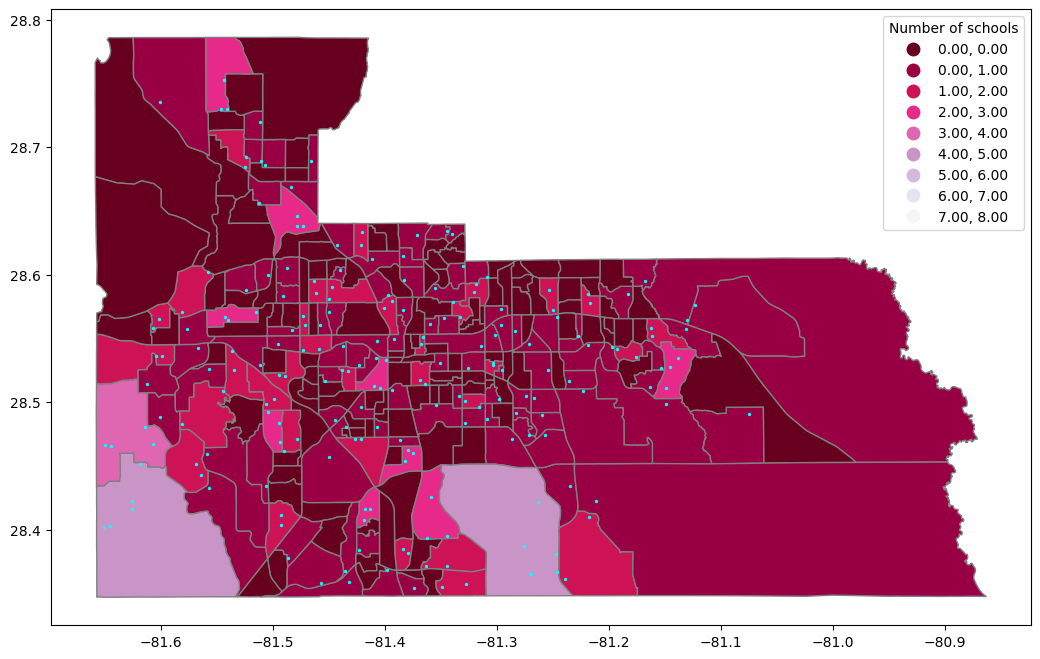

In [56]:
fig, ax = plt.subplots(figsize = (14, 8))

# Display the output of our spatial join
tracts_schoolcounts.plot(ax=ax,
                         column='NAME_left',
                         scheme="user_defined",
                         classification_kwds={'bins': list(range(9))},
                         cmap="PuRd_r",
                         edgecolor="grey",
                         legend=True,
                         legend_kwds={'title': 'Number of schools'})
school_orange_map.plot(ax=ax,
                 color='cyan',
                 markersize=2);

In [57]:
# save layers as .geojson
school_orange_map.to_file('school_orange_map.json', driver='GeoJSON')
tracts_schoolcounts.to_file('tracts_schoolcounts.json', driver='GeoJSON')
orange_county.to_file('orange_county.json', driver='GeoJSON')
bike_facilities_orange.to_file('bike_facilities_orange.json', driver='GeoJSON')

## Interactive Visualization

In addition to the static maps, we can visualize the spaital data on an interactive map. Here we use the `folium` library with `.geojson` layers for demonstration.

`Folium`is a Python wrapper around leaflet.js, one of the most popular javascript libraries for rendering interactive maps on the web.

Check out the Folium docs [here](https://https://python-visualization.github.io/folium/latest/).

In [58]:
! pip install folium

In [59]:
import folium

With a single line of code, Folium makes it easy to pull up an interactive map. Isn't it nice to pan and zoom?

In [60]:
folium.Map(location=[28.54740191410911, -81.38654958665236]) #DPAC

And in another single line, you can save the .html to render it in the browser, or embed it in your final project site!

Folium let's you pick the map tile provider you want to use. Folium has the following tile provider options built in:

- OpenStreetMap
- CartoDB positron
- CartoDB dark_matter

In [62]:
folium.Map(location=[28.54740191410911, -81.38654958665236], tiles='CartoDB positron')

See here or the full list of all available leaflet tile providers. You can access like through folium like so:

In [63]:
folium.Map(
    location=[28.536, -81.395],
    tiles='https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
    attr='Tiles &copy; Esri &mdash; Source: Esri, i-cubed, USDA, USGS, AEX, GeoEye, Getmapping, Aerogrid, IGN, IGP, UPR-EGP, and the GIS User Community')

In [64]:
m = folium.Map(
        location = [28.536, -81.395], # we get the [lat, lon] of Orange County [28.536, -81.395]
        tiles = "CartoDB positron",
        zoom_start = 10
        )

folium.GeoJson('orange_county.json', name = "county").add_to(m)
folium.GeoJson('school_orange_map.json', name = "school").add_to(m)
folium.GeoJson('bike_facilities_orange.json', name = "bike facility").add_to(m)

for i in range(0, len(school_orange_map)):
    folium.Marker(location = [school_orange_map.iloc[i]['geometry'].y, school_orange_map.iloc[i]['geometry'].x],
          popup = school_orange_map.iloc[i]['NAME'],).add_to(m)

folium.LayerControl().add_to(m)

m

In [65]:
m.save('my_map.html')

With that many points, you probably don't want to render them all as markers anyways. It's too hard to click on the ones that are right on top of each other. Instead, try some of the following plugins for plotting tons of point data:

In [66]:
from folium import plugins
m = folium.Map(location=[28.536, -81.395], tiles='Cartodb dark_matter', zoom_start=10)
heat_data = [[point.xy[1][0], point.xy[0][0]] for point in school_orange_map.geometry]

# plugins.MarkerCluster(heat_data).add_to(m)
plugins.HeatMap(heat_data).add_to(m)

m

For more on Folium, read the docs!

- choropleths: https://python-visualization.github.io/folium/quickstart.html#Choropleth-maps
- styling: https://python-visualization.github.io/folium/quickstart.html#Styling-function
- GeoPandas polgyons: https://geopandas.org/en/stable/gallery/polygon_plotting_with_folium.html#Add-polygons-to-map

### Interactive maps in plotly

Adapted Sam Maurer, who adapted this from https://plot.ly/python/mapbox-county-choropleth/

Plotly can create two different kinds of interactive map widgets:

1. Interactive versions of GeoPandas/GeoPlot maps
2. Map data overlaid on top of Mapbox tiles

Here are the best places to start:

https://plot.ly/python/plotly-express/#maps (examples)
https://plot.ly/python-api-reference/plotly.express.html (API referece)

The names of the Plotly Express map types are:
`scatter_geo`
`scatter_mapbox`
`line_geo`
`line_mapbox`
`choropleth`
`choropleth_mapbox`

As an example, we'll make a choropleth map that's overlaid on top of Mapbox tiles!

#### Load data

In this case, we need the geometry in GeoJSON format. GeoJSON is a web-native format, so it's easy to overlay on top of map tiles.

We'll then load the feature attributes from a separate table.

In [67]:
import requests
res = requests.get("https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json")
counties = res.json()

In [68]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/fips-unemp-16.csv",
                   dtype={"fips": str})

#### Make the map

In [69]:
import plotly
import plotly.express as px

In [70]:
fig = px.choropleth_mapbox(
    df,
    geojson=counties,
    locations='fips',
    color='unemp',
    color_continuous_scale="Viridis",
    range_color=(0, 12),
    mapbox_style="carto-positron",
    zoom=3,
    center = {"lat": 28.536, "lon": -81.395},
    opacity=0.5,
    labels={'unemp':'unemployment rate'})

fig.show()

And of course we can easily generate .html to render elsewhere:

In [71]:
with open('choro.html', 'w+') as f:
    f.write(plotly.offline.plot(fig, include_plotlyjs='cdn', output_type='div'))

# 5. Network Analysis

## Accessibility

- Accessibility is a very important, but broadly defined, topic in land use and transportation planning
- In general, accessibility is a conceptual framework for thinking about:
- distribution of amenities/opportunities in space
- relative ease/difficulty of reaching these resources
- equity/justice-oriented issues relating to the built environment

**Question:** How do you measure accessibility?

There is no one right way:
- Attribute of what?
  - geography
  - population
- Aggregate or singular?
  - one-to-one (e.g. shortest path)
  - many-to-one (e.g. nearest neighbor)
  - one-to-many (e.g. cumulative opportunities)
- Unit of measure?
  - impedances (e.g. distance, time, cost)
  - density

## Networks

- Networks are most commonly used to describe relationships between interconnected entities
  - incredibly useful for measuring accessibility
- Offers abstract representation of both
  1. the distribution of things in relation to some exogenously defined reference
    - e.g. coordinates in a CRS
  2. characteristics of the paths that connect them
    - e.g. impedances, geometries
- In network parlance these entities are called **nodes** and **edges**, respectively. Together, these comprise a data structure known as a **network graph**


## Transportation Networks

### Characteristics
- Typically modeled with intersections as the nodes and segments between intersections as the edges
- Can be mode-specific -- i.e. walk, bike, drive, transit
- Can be hierarchical -- i.e. freeway vs. local roads

### Data Sources

- [OpenStreetMap](https://osmfoundation.org/wiki/Main_Page)
  - Open source, crowdsourced catalog of global transportation network data
    - streets, bike lanes, sidewalks (!)
  - Extras: administrative boundaries, place names, addresses (geocoding), turn-by-turn routing, trip planning, map tiles, building footprints, traffic control
- [Transit.land](https://https://www.transit.land/) for GTFS data
  - Generalized Transit Feed Specification
  - Stations, schedules, etc.


## Pandana: Pandas for Network Analysis

Here we demonstrate the main features of the Pandana library, a Python package for network analysis that uses a fancy algorithm called contraction hierarchies to calculate super-fast travel accessibility metrics and shortest paths.

See full documentation here: http://udst.github.io/pandana/

### Load data

You may need to install `OSMnet`

In [72]:
! pip install OSMnet

In [73]:
! pip install pandana

In [74]:
from pandana.loaders import osm
import warnings
import pandana
import pandas as pd
import geopandas
warnings.filterwarnings('ignore')

In [75]:
print(geopandas.__version__)
print(pandana.__version__)

0.14.4
0.7


In [76]:
network = osm.pdna_network_from_bbox(28.346889,	-81.658612, 28.78619, -80.862908)  # Orlando, FL

INFO:osmnet:Requesting network data within bounding box from Overpass API in 4 request(s)
INFO:osmnet:Posting to http://www.overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"]["highway"!~"motor|proposed|construction|abandoned|platform|raceway"]["foot"!~"no"]["pedestrians"!~"no"](28.34688900,-81.26130449,28.56731123,-80.86290800);>;);out;'}"


Requesting network data within bounding box from Overpass API in 4 request(s)
Posting to http://www.overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"]["highway"!~"motor|proposed|construction|abandoned|platform|raceway"]["foot"!~"no"]["pedestrians"!~"no"](28.34688900,-81.26130449,28.56731123,-80.86290800);>;);out;'}"


INFO:osmnet:Downloaded 13,887.9KB from www.overpass-api.de in 3.91 seconds
INFO:osmnet:Posting to http://www.overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"]["highway"!~"motor|proposed|construction|abandoned|platform|raceway"]["foot"!~"no"]["pedestrians"!~"no"](28.34688900,-81.65861200,28.56712893,-81.26076490);>;);out;'}"


Downloaded 13,887.9KB from www.overpass-api.de in 3.91 seconds
Posting to http://www.overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"]["highway"!~"motor|proposed|construction|abandoned|platform|raceway"]["foot"!~"no"]["pedestrians"!~"no"](28.34688900,-81.65861200,28.56712893,-81.26076490);>;);out;'}"


INFO:osmnet:Downloaded 79,780.0KB from www.overpass-api.de in 3.80 seconds


Downloaded 79,780.0KB from www.overpass-api.de in 3.80 seconds


INFO:osmnet:Posting to http://www.overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"]["highway"!~"motor|proposed|construction|abandoned|platform|raceway"]["foot"!~"no"]["pedestrians"!~"no"](28.56578247,-81.65861200,28.78677599,-81.26130449);>;);out;'}"


Posting to http://www.overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"]["highway"!~"motor|proposed|construction|abandoned|platform|raceway"]["foot"!~"no"]["pedestrians"!~"no"](28.56578247,-81.65861200,28.78677599,-81.26130449);>;);out;'}"


INFO:osmnet:Downloaded 48,957.9KB from www.overpass-api.de in 2.89 seconds


Downloaded 48,957.9KB from www.overpass-api.de in 2.89 seconds


INFO:osmnet:Posting to http://www.overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"]["highway"!~"motor|proposed|construction|abandoned|platform|raceway"]["foot"!~"no"]["pedestrians"!~"no"](28.56712893,-81.26185014,28.78677599,-80.86290800);>;);out;'}"


Posting to http://www.overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"]["highway"!~"motor|proposed|construction|abandoned|platform|raceway"]["foot"!~"no"]["pedestrians"!~"no"](28.56712893,-81.26185014,28.78677599,-80.86290800);>;);out;'}"


INFO:osmnet:Downloaded 18,538.8KB from www.overpass-api.de in 1.06 seconds


Downloaded 18,538.8KB from www.overpass-api.de in 1.06 seconds


INFO:osmnet:Downloaded OSM network data within bounding box from Overpass API in 4 request(s) and 16.65 seconds


Downloaded OSM network data within bounding box from Overpass API in 4 request(s) and 16.65 seconds


INFO:osmnet:17,993 duplicate records removed. Took 20.72 seconds


17,993 duplicate records removed. Took 20.72 seconds


INFO:osmnet:Returning OSM data with 1,122,391 nodes and 198,074 ways...


Returning OSM data with 1,122,391 nodes and 198,074 ways...


INFO:osmnet:Edge node pairs completed. Took 180.53 seconds


Edge node pairs completed. Took 180.53 seconds


INFO:osmnet:Returning processed graph with 271,284 nodes and 388,607 edges...
INFO:osmnet:Completed OSM data download and Pandana node and edge table creation in 239.05 seconds


Returning processed graph with 271,284 nodes and 388,607 edges...
Completed OSM data download and Pandana node and edge table creation in 239.05 seconds


## Exploring the data
Edges and nodes are visible as DataFrames

In [77]:
network.nodes_df.head()

x          y
id                            
26771586 -81.363858  28.451061
26771587 -81.397926  28.450512
26771589 -81.401654  28.447639
26785610 -81.405657  28.435975
26785611 -81.406069  28.435975

## Reading/Writing to disk
You can't directly save a Pandana network object, but you can easily recreate it from the nodes and edges.

In [78]:
network.nodes_df.to_csv('nodes.csv')
network.edges_df.to_csv('edges.csv')

In [79]:
nodes = pd.read_csv('nodes.csv', index_col=0)
edges = pd.read_csv('edges.csv', index_col=[0,1])

In [80]:
network = pandana.Network(nodes['x'], nodes['y'],
                          edges['from'], edges['to'], edges[['distance']])

## Computing shortest paths
Lets download the location of Orlando restaurants listed on OSM, and then calculate some shortest paths between them.

In [81]:
restaurants = osm.node_query(
    28.346889,	-81.658612, 28.78619, -80.862908, tags='"amenity"="restaurant"')

Choose two at random and find the closest network nodes to each one:

In [82]:
res = restaurants.sample(2)
res

lat        lon     amenity cuisine         name smoking  \
id                                                                          
6680742128  28.601773 -81.362646  restaurant     NaN    Bar Louie     NaN   
6901109563  28.565276 -81.587054  restaurant     NaN  Urban Flats     NaN   

           addr:city addr:housenumber addr:postcode addr:street  ... stars  \
id                                                               ...         
6680742128       NaN              NaN           NaN         NaN  ...   NaN   
6901109563       NaN              NaN           NaN         NaN  ...   NaN   

           brewery diet:non-vegetarian diet:chicken website:menu diet:fish  \
id                                                                           
6680742128     NaN                 NaN          NaN          NaN       NaN   
6901109563     NaN                 NaN          NaN          NaN       NaN   

           diet:organic diet:seafood microbrewery disused:amenity  
id                                                                 
6680742128          NaN          NaN          NaN             NaN  
6901109563          NaN          NaN          NaN             NaN  

[2 rows x 117 columns]

In [83]:
res1, res2 = network.get_node_ids(res.lon, res.lat).values

Then use the traverse the network to find the shortest path between them:

In [84]:
network.shortest_path(res1, res2)

array([ 4633404821,  2192220339,  5800939781,  5828611808,  5336007319,
        5336007320,  5336009722,  8858613477,  8858613476,  8598714970,
        8598714971,  5336009626,  2235174118,    57526301,  2192220330,
        5336009625,  8858613471,  5813856814,  8858613469,  5813856810,
        5813856817,  5813856818,    99574920,  2235174111,  2207176228,
          99574921,    99574922,    99574923,    99550267,  2207176220,
        2207176201, 12190165282, 12190165270, 12190165274,  5336000096,
       12190165278, 12011844128,   585829100,   917757690,  5336007270,
        5336005963,  7811458446,  8858591358,  8858591360,  8858591361,
        6945000238,  7199182673,  7199182672,  7199182671,  7199182676,
        7632231628,  8231770283,  8231770278,    99475353,  8266312002,
        6936442641,  6936442648,    99475357, 10155997641,  2207176184,
        2207176185,  6402527780,  6402527773,  8581102229,  8581102233,
        7662861966,    99566105,  5300342622, 11486412422,    99

In [85]:
network.shortest_path_length(res1, res2)

24630.217

NOTE: Watch your units!

## Calculate many shortest paths at once
Pandana can generate several million shortest paths in ~1 minute.

In [86]:
restaurant_nodes = network.get_node_ids(restaurants.lon, restaurants.lat).values

origs = [o for o in restaurant_nodes for d in restaurant_nodes]
dests = [d for o in restaurant_nodes for d in restaurant_nodes]

In [87]:
%%time
distances = network.shortest_path_lengths(origs, dests)

CPU times: user 38.8 s, sys: 187 ms, total: 38.9 s
Wall time: 25.1 s


Now we have the distance from each restaurant to each other restaurant.

In [88]:
pd.Series(distances).describe()

count    5.329000e+05
mean     3.229020e+05
std      1.088358e+06
min      0.000000e+00
25%      1.612476e+04
50%      2.454532e+04
75%      3.679840e+04
max      4.294967e+06
dtype: float64

## Proximity (a.k.a. nearest neighbor)

Here our goal is to find the closest restaurants to each node on the network. Perhaps we are hungrier than we are picky.

To do a network-wide calculation like this, we first need to formally add the restaurants into the network.

In [89]:
network.set_pois(category='restaurants',  # can call it anything we want
                 maxdist=1000,  # don't search for POIs past this distance
                 maxitems=3,
                 x_col=restaurants.lon,
                 y_col=restaurants.lat)

Now we can run the query

In [90]:
results = network.nearest_pois(distance=1000,
                               category='restaurants',
                               num_pois=3,
                               include_poi_ids = True)
results.head()

1            2            3          poi1          poi2  \
id                                                                            
26771586   725.400024  1000.000000  1000.000000  4.147789e+09           NaN   
26771587   242.373993   530.338989   559.247009  1.668191e+09  9.328916e+09   
26771589   347.244995   500.442993   655.445007  1.922910e+09  8.975198e+09   
26785610  1000.000000  1000.000000  1000.000000           NaN           NaN   
26785611  1000.000000  1000.000000  1000.000000           NaN           NaN   

                  poi3  
id                      
26771586           NaN  
26771587  6.605074e+09  
26771589  1.668191e+09  
26785610           NaN  
26785611           NaN

## Network aggregation
Here we ask: "how many restaurants are within 500 meters of each node?" This type of query can be thought of as a measure of **cumulative accessibility**.

In [91]:
restaurant_nodes = network.get_node_ids(restaurants.lon, restaurants.lat)
network.set(restaurant_nodes, name = 'restaurants')

Now we can run the query.

In [92]:
accessibility = network.aggregate(
    distance=500,
    type='count',  # could also do mean, sum, percentile, like pandas aggregation functions
    decay='flat',  # can apply exponential or linear decay for sum/mean
    name='restaurants'
)
print(accessibility.head())
print(accessibility.describe())

id
26771586    0.0
26771587    1.0
26771589    1.0
26785610    0.0
26785611    0.0
dtype: float64
count    271284.000000
mean          0.662660
std           1.910617
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          23.000000
dtype: float64


## Visualize your results
Pandana's built-in `plot` function uses an older Matplotlib extension called Basemap that's now difficult to install. So we'll just use Matplotlib directly.

In [93]:
import matplotlib
from matplotlib import pyplot as plt

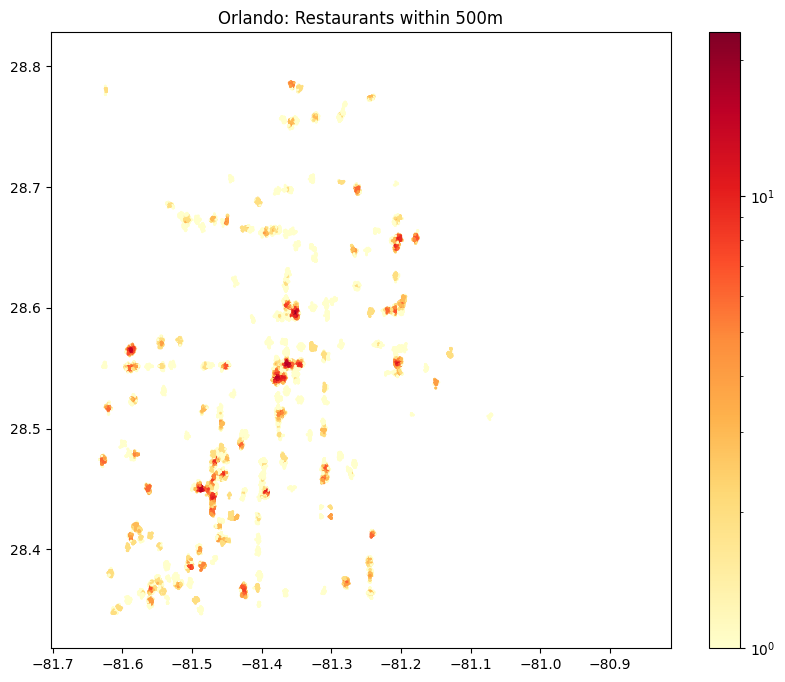

In [94]:
fig, ax = plt.subplots(figsize=(10,8))

plt.title('Orlando: Restaurants within 500m')
plt.scatter(network.nodes_df.x, network.nodes_df.y,
            c=accessibility, s=1, cmap='YlOrRd',
            norm=matplotlib.colors.LogNorm())

cb = plt.colorbar()

plt.show()

# OSMnx: OpenStreetMap + NetworkX

OSMnx is a Python library that lets you download spatial geometries and construct, project, and visualize street networks from OpenStreetMap's API. It makes heavy use of the NetworkX library for network analysis.

https://www.openstreetmap.org

OSMnx documentation: https://osmnx.readthedocs.io/en/stable/index.html
OSMnx examples: https://github.com/gboeing/osmnx-examples/tree/master/notebooks

NetworkX documentation: https://networkx.github.io/documentation/stable/

In [95]:
! pip install osmnx

In [96]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import networkx as nx
import osmnx
print(osmnx.__version__)
osmnx.config(log_file=True, log_console=True, use_cache=True)

1.9.4


## Download place boundaries

OSMnx makes it a little easier to download OSM data, especially non-network data like place boundaries or building footprints.

In [97]:
city = osmnx.geocode_to_gdf('Manhattan, New York, New York, USA')
type(city)

INFO:OSMnx:Pausing 1 second(s) before making HTTP GET request to 'nominatim.openstreetmap.org'
INFO:OSMnx:Get https://nominatim.openstreetmap.org/search?format=json&polygon_geojson=1&dedupe=0&limit=50&q=Manhattan%2C+New+York%2C+New+York%2C+USA with timeout=180
INFO:OSMnx:Downloaded 28.9kB from 'nominatim.openstreetmap.org' with status 200
INFO:OSMnx:Saved response to cache file 'cache/bddc57dc89dd819f2997e2d1b8d89fa9c1b21757.json'
INFO:OSMnx:Created GeoDataFrame with 1 rows from 1 queries


geopandas.geodataframe.GeoDataFrame

In [98]:
city.head()

geometry  bbox_north  bbox_south  \
0  MULTIPOLYGON (((-74.04588 40.68943, -74.04552 ...   40.882012   40.679654   

   bbox_east  bbox_west   place_id  osm_type   osm_id        lat        lon  \
0 -73.906769 -74.045877  331711420  relation  8398124  40.789624 -73.959894   

      class            type  place_rank  importance addresstype       name  \
0  boundary  administrative          14    0.731041      suburb  Manhattan   

                                        display_name  
0  Manhattan, New York County, New York, United S...

### Reprojection
You can use any standard tools for plotting geodataframe geometries, but OSMNx also has some helper functions for handling projections and basic mapping. You will want to make sure you working with cartesian coordinates before performing any network analysis

In [99]:
# uses the optimal local UTM projection by default
osmnx.project_gdf(city).head()

INFO:OSMnx:Projected GeoDataFrame to 'EPSG:32618 / WGS 84 / UTM zone 18N'


geometry  bbox_north  bbox_south  \
0  MULTIPOLYGON (((580619.207 4504719.421, 580650...   40.882012   40.679654   

   bbox_east  bbox_west   place_id  osm_type   osm_id        lat        lon  \
0 -73.906769 -74.045877  331711420  relation  8398124  40.789624 -73.959894   

      class            type  place_rank  importance addresstype       name  \
0  boundary  administrative          14    0.731041      suburb  Manhattan   

                                        display_name  
0  Manhattan, New York County, New York, United S...

INFO:OSMnx:Projected GeoDataFrame to 'EPSG:32618 / WGS 84 / UTM zone 18N'


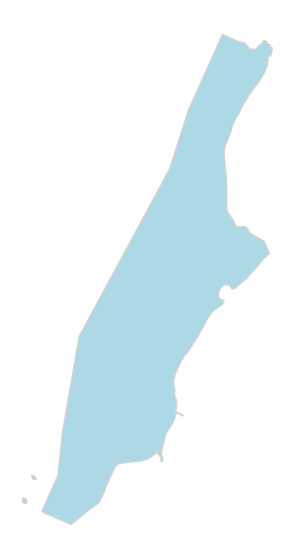

In [100]:
fig, ax = plt.subplots(figsize=(7,7))
osmnx.project_gdf(city).plot(fc='lightblue', ec='lightgrey', ax=ax)
_ = ax.axis('off')

INFO:OSMnx:Pausing 1 second(s) before making HTTP GET request to 'nominatim.openstreetmap.org'
INFO:OSMnx:Get https://nominatim.openstreetmap.org/search?format=json&polygon_geojson=1&dedupe=0&limit=50&q=Orlando%2C+Florida%2C+USA with timeout=180
INFO:OSMnx:Downloaded 113.5kB from 'nominatim.openstreetmap.org' with status 200
INFO:OSMnx:Saved response to cache file 'cache/e6084e99305b2161a55e8779f65a8c4fa7f42c8d.json'
INFO:OSMnx:Pausing 1 second(s) before making HTTP GET request to 'nominatim.openstreetmap.org'
INFO:OSMnx:Get https://nominatim.openstreetmap.org/search?format=json&polygon_geojson=1&dedupe=0&limit=50&q=Windermere%2C+Florida%2C+USA with timeout=180
INFO:OSMnx:Downloaded 22.1kB from 'nominatim.openstreetmap.org' with status 200
INFO:OSMnx:Saved response to cache file 'cache/721ac778b3fe93591f2406f9ca47c8d90304703e.json'
INFO:OSMnx:Pausing 1 second(s) before making HTTP GET request to 'nominatim.openstreetmap.org'
INFO:OSMnx:Get https://nominatim.openstreetmap.org/search?for

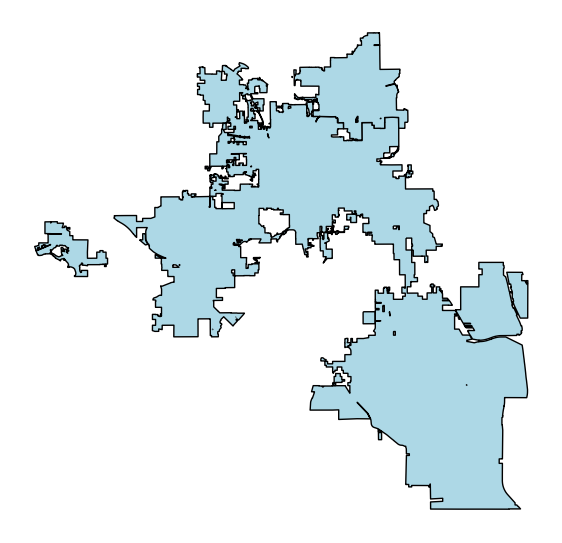

In [101]:
# multiple places at once
place_names = ['Orlando, Florida, USA',
               'Windermere, Florida, USA',
               'Winter Park, Florida, USA']

orange = osmnx.geocode_to_gdf(place_names)

fig, ax = plt.subplots(figsize=(7,7))
osmnx.project_gdf(orange).plot(fc='lightblue', ec='k', ax=ax)
_ = ax.axis('off')

## Download and process street networks

OSMnx lets you download street network data and build topologically-corrected street networks, project and plot the networks, and save the street network as SVGs, GraphML files, or shapefiles for later use. The street networks are directed and preserve one-way directionality.

Note that a **graph** is the math/computer science term for the data structure you probably think of as a "network": a set of vertices/nodes/points that are connected by edges/links/lines. More here). This can be confusing because data visualizations are often called "graphs" as well; it seems like this originally referred only to network diagrams but has now expanded to include more things. Consider calling your data visualizations "charts" instead!

You can download a street network by providing OSMnx any of the following:

- a bounding box
- a lat-lon point plus a distance
- an address plus a distance
- a place name or list of place names (to automatically geocode and get the boundary of)
- a polygon of the desired street network's boundaries

You can also specify several different network types:

- 'drive' - get drivable public streets (but not service roads)
- 'drive_service' - get drivable streets, including service roads
- 'walk' - get all streets and paths that pedestrians can use (this network type ignores one-way directionality)
- 'bike' - get all streets and paths that cyclists can use
- 'all' - download all non-private OSM streets and paths (this is the default network type unless you specify a different one)
- 'all_private' - download all OSM streets and paths, including private-access ones

### Streets within a bounding box

This constructs the network from all the OSM "nodes" (a.k.a. intersections or vertices) and "ways" (a.k.a. streets, edges, links, etc.) within the bounding box.

INFO:OSMnx:Projected GeoDataFrame to 'EPSG:32617 / WGS 84 / UTM zone 17N'
INFO:OSMnx:Projected GeoDataFrame to 'EPSG:4326 / WGS 84'
INFO:OSMnx:Projected GeoDataFrame to 'EPSG:32617 / WGS 84 / UTM zone 17N'
INFO:OSMnx:Projected GeoDataFrame to 'EPSG:4326 / WGS 84'
INFO:OSMnx:Requesting data from API in 4 request(s)
INFO:OSMnx:Resolved 'overpass-api.de' to '65.109.112.52'
INFO:OSMnx:Pausing 0 second(s) before making HTTP POST request to 'overpass-api.de'
INFO:OSMnx:Post https://overpass-api.de/api/interpreter?data=%5Bout%3Ajson%5D%5Btimeout%3A180%5D%3B%28way%5B%22highway%22%5D%5B%22area%22%21~%22yes%22%5D%5B%22access%22%21~%22private%22%5D%5B%22highway%22%21~%22abandoned%7Cbridleway%7Cbus_guideway%7Cconstruction%7Ccorridor%7Ccycleway%7Celevator%7Cescalator%7Cfootway%7Cno%7Cpath%7Cpedestrian%7Cplanned%7Cplatform%7Cproposed%7Craceway%7Crazed%7Cservice%7Csteps%7Ctrack%22%5D%5B%22motor_vehicle%22%21~%22no%22%5D%5B%22motorcar%22%21~%22no%22%5D%5B%22service%22%21~%22alley%7Cdriveway%7Cemergenc

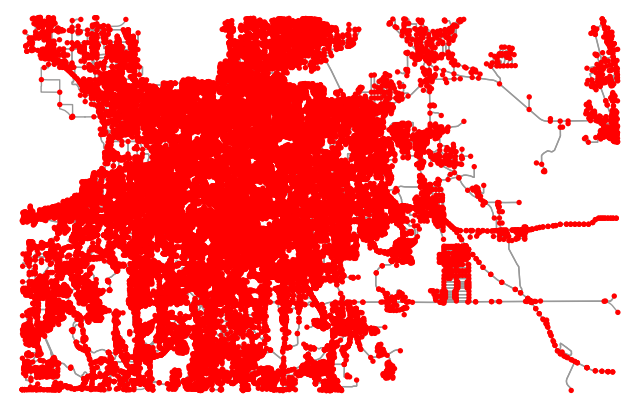

INFO:OSMnx:Finished plotting the graph


In [102]:
# define a bounding box
north, south, east, west =  28.346889,	28.78619, -80.862908, -81.658612,

# create network from that bounding box
G1 = osmnx.graph_from_bbox(north, south, east, west, network_type='drive')
G1_projected = osmnx.project_graph(G1)

fig, ax = osmnx.plot_graph(G1_projected, bgcolor='none', node_color='red')
fig.show()

In [103]:
type(G1)

networkx.classes.multidigraph.MultiDiGraph

### Street network by place name

INFO:OSMnx:Retrieved response from cache file 'cache/e6084e99305b2161a55e8779f65a8c4fa7f42c8d.json'
INFO:OSMnx:Created GeoDataFrame with 1 rows from 1 queries
INFO:OSMnx:Constructed place geometry polygon(s) to query API
INFO:OSMnx:Projected GeoDataFrame to 'EPSG:32617 / WGS 84 / UTM zone 17N'
INFO:OSMnx:Projected GeoDataFrame to 'EPSG:4326 / WGS 84'
INFO:OSMnx:Projected GeoDataFrame to 'EPSG:32617 / WGS 84 / UTM zone 17N'
INFO:OSMnx:Projected GeoDataFrame to 'EPSG:4326 / WGS 84'
INFO:OSMnx:Requesting data from API in 1 request(s)
INFO:OSMnx:Resolved 'overpass-api.de' to '65.109.112.52'
INFO:OSMnx:Pausing 0 second(s) before making HTTP POST request to 'overpass-api.de'
INFO:OSMnx:Post https://overpass-api.de/api/interpreter?data=%5Bout%3Ajson%5D%5Btimeout%3A180%5D%3B%28way%5B%22highway%22%5D%5B%22area%22%21~%22yes%22%5D%5B%22highway%22%21~%22abandoned%7Cconstruction%7Cno%7Cplanned%7Cplatform%7Cproposed%7Craceway%7Crazed%22%5D%28poly%3A%2728.521837+-81.512565+28.522002+-81.512600+28.522

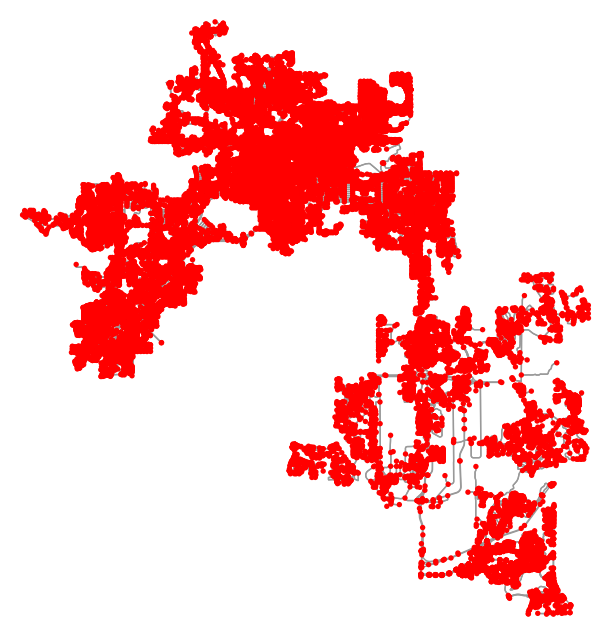

INFO:OSMnx:Finished plotting the graph


In [104]:
G2 = osmnx.graph_from_place('Orlando, Florida, USA')
G2_projected = osmnx.project_graph(G2)
fig, ax = osmnx.plot_graph(G2_projected, bgcolor='none', node_color='red')
fig.show()

INFO:OSMnx:Begin plotting the graph...
INFO:OSMnx:Created edges GeoDataFrame from graph
INFO:OSMnx:Created nodes GeoDataFrame from graph


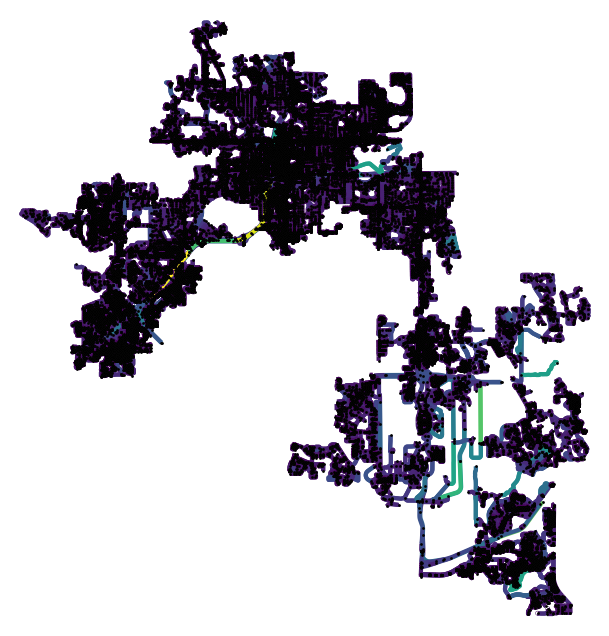

INFO:OSMnx:Finished plotting the graph


In [105]:
ec = osmnx.plot.get_edge_colors_by_attr(G2_projected, attr='length')
fig, ax = osmnx.plot_graph(
    G2_projected, bgcolor='none',
    node_color='w', node_edgecolor='k', node_size=1, node_zorder=3,
    edge_color=ec, edge_linewidth=3)
fig.show()

### Street network within a distance radius
- This can be either a straight-line distance (implemented as a bounding box) or a network distance.
- If it's a *driving* network, the network distances will respect one-way streets, but if it's a *walking* network, two-way travel is allowed everywhere.

INFO:OSMnx:Created bbox 500 m from (28.547389987551757, -81.38584335347788): 28.55188658922922,28.542893385874294,-81.38072440049592,-81.39096230645984
INFO:OSMnx:Projected GeoDataFrame to 'EPSG:32617 / WGS 84 / UTM zone 17N'
INFO:OSMnx:Projected GeoDataFrame to 'EPSG:4326 / WGS 84'
INFO:OSMnx:Projected GeoDataFrame to 'EPSG:32617 / WGS 84 / UTM zone 17N'
INFO:OSMnx:Projected GeoDataFrame to 'EPSG:4326 / WGS 84'
INFO:OSMnx:Requesting data from API in 1 request(s)
INFO:OSMnx:Resolved 'overpass-api.de' to '65.109.112.52'
INFO:OSMnx:Pausing 0 second(s) before making HTTP POST request to 'overpass-api.de'
INFO:OSMnx:Post https://overpass-api.de/api/interpreter?data=%5Bout%3Ajson%5D%5Btimeout%3A180%5D%3B%28way%5B%22highway%22%5D%5B%22area%22%21~%22yes%22%5D%5B%22access%22%21~%22private%22%5D%5B%22highway%22%21~%22abandoned%7Cbus_guideway%7Cconstruction%7Ccycleway%7Cmotor%7Cno%7Cplanned%7Cplatform%7Cproposed%7Craceway%7Crazed%22%5D%5B%22foot%22%21~%22no%22%5D%5B%22service%22%21~%22private%22

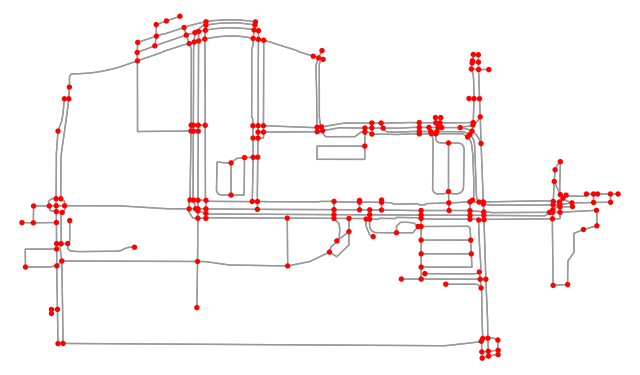

INFO:OSMnx:Finished plotting the graph


In [106]:
# define a point at the corner of DPAC
location_point = (28.547389987551757, -81.38584335347788)

# create network only of nodes within 500m walking along the network from point
G3 = osmnx.graph_from_point(location_point, dist=500, dist_type='network', network_type='walk')
G3 = osmnx.project_graph(G3)

fig, ax = osmnx.plot_graph(G3, bgcolor='none', node_color='red')
fig.show()

## Converting networks and saving them to disk

Remember that the street networks are not GeoDataFrames -- they contain information about both nodes (points) and edges (lines). When you save them to geospatial formats like a Shapefile or GeoJSON, you'll need two separate files.

### Network Graph to Shapefile

In [107]:
osmnx.save_graph_shapefile(G3, filepath='network-shape')

INFO:OSMnx:Created edges GeoDataFrame from graph
INFO:OSMnx:Converted MultiDiGraph to undirected MultiGraph
INFO:OSMnx:Created nodes GeoDataFrame from graph
INFO:OSMnx:Created edges GeoDataFrame from graph
INFO:OSMnx:Saved graph as shapefiles at PosixPath('network-shape')
